In [22]:
#import library
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep

In [3]:
page = requests.get("https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/")
soup=BeautifulSoup(page.text,'html.parser')
# dfs=pd.read_html(page.text)
# dfs
# soup

In [4]:
table=soup.find_all('table')
df=pd.read_html(str(table))[0]
df

Bank Name               City State   Cert  \
0                    Almena State Bank             Almena    KS  15426   
1           First City Bank of Florida  Fort Walton Beach    FL  16748   
2                 The First State Bank      Barboursville    WV  14361   
3                   Ericson State Bank            Ericson    NE  18265   
4     City National Bank of New Jersey             Newark    NJ  21111   
..                                 ...                ...   ...    ...   
558                 Superior Bank, FSB           Hinsdale    IL  32646   
559                Malta National Bank              Malta    OH   6629   
560    First Alliance Bank & Trust Co.         Manchester    NH  34264   
561  National State Bank of Metropolis         Metropolis    IL   3815   
562                   Bank of Honolulu           Honolulu    HI  21029   

                   Acquiring Institution       Closing Date  
0                            Equity Bank   October 23, 2020  
1              United Fidelity Bank, fsb   October 16, 2020  
2                         MVB Bank, Inc.      April 3, 2020  
3             Farmers and Merchants Bank  February 14, 2020  
4                        Industrial Bank   November 1, 2019  
..                                   ...                ...  
558                Superior Federal, FSB      July 27, 2001  
559                    North Valley Bank        May 3, 2001  
560  Southern New Hampshire Bank & Trust   February 2, 2001  
561              Banterra Bank of Marion  December 14, 2000  
562                   Bank of the Orient   October 13, 2000  

[563 rows x 6 columns]

In [5]:
test1=df[(df["State"]!="NE")&(df["State"]!="KS")&(df["State"]!="FL")]

In [6]:
ls=['Bank Name', 'City', 'State','Closing Date']
test2=test1[ls]

In [7]:
from datetime import datetime as dt

In [8]:
dt.now()

datetime.datetime(2021, 4, 29, 16, 24, 34, 279064)

In [9]:
test2["current_tmstmp"]=dt.now()

<ipython-input-9-e92df168698e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["current_tmstmp"]=dt.now()


In [10]:
test2

Bank Name           City State  \
2                 The First State Bank  Barboursville    WV   
4     City National Bank of New Jersey         Newark    NJ   
5                        Resolute Bank         Maumee    OH   
6                Louisa Community Bank         Louisa    KY   
7                 The Enloe State Bank         Cooper    TX   
..                                 ...            ...   ...   
558                 Superior Bank, FSB       Hinsdale    IL   
559                Malta National Bank          Malta    OH   
560    First Alliance Bank & Trust Co.     Manchester    NH   
561  National State Bank of Metropolis     Metropolis    IL   
562                   Bank of Honolulu       Honolulu    HI   

          Closing Date             current_tmstmp  
2        April 3, 2020 2021-04-29 16:24:35.903442  
4     November 1, 2019 2021-04-29 16:24:35.903442  
5     October 25, 2019 2021-04-29 16:24:35.903442  
6     October 25, 2019 2021-04-29 16:24:35.903442  
7         May 31, 2019 2021-04-29 16:24:35.903442  
..                 ...                        ...  
558      July 27, 2001 2021-04-29 16:24:35.903442  
559        May 3, 2001 2021-04-29 16:24:35.903442  
560   February 2, 2001 2021-04-29 16:24:35.903442  
561  December 14, 2000 2021-04-29 16:24:35.903442  
562   October 13, 2000 2021-04-29 16:24:35.903442  

[472 rows x 5 columns]

In [11]:
test2["State"]=test2['State'].sort_values().values

<ipython-input-11-9eb851334915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["State"]=test2['State'].sort_values().values


In [12]:
test2["City"]=test2['City'].sort_values(ascending=False).values
test2

<ipython-input-12-5869bbe64a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["City"]=test2['City'].sort_values(ascending=False).values


Bank Name         City State       Closing Date  \
2                 The First State Bank      Wyoming    AL      April 3, 2020   
4     City National Bank of New Jersey        Worth    AL   November 1, 2019   
5                        Resolute Bank    Woodstock    AL   October 25, 2019   
6                Louisa Community Bank    Woodstock    AL   October 25, 2019   
7                 The Enloe State Bank    Woodstock    AL       May 31, 2019   
..                                 ...          ...   ...                ...   
558                 Superior Bank, FSB        Aledo    WI      July 27, 2001   
559                Malta National Bank  Albuquerque    WI        May 3, 2001   
560    First Alliance Bank & Trust Co.        Alamo    WV   February 2, 2001   
561  National State Bank of Metropolis        Ailey    WV  December 14, 2000   
562                   Bank of Honolulu      Acworth    WY   October 13, 2000   

                current_tmstmp  
2   2021-04-29 16:24:35.903442  
4   2021-04-29 16:24:35.903442  
5   2021-04-29 16:24:35.903442  
6   2021-04-29 16:24:35.903442  
7   2021-04-29 16:24:35.903442  
..                         ...  
558 2021-04-29 16:24:35.903442  
559 2021-04-29 16:24:35.903442  
560 2021-04-29 16:24:35.903442  
561 2021-04-29 16:24:35.903442  
562 2021-04-29 16:24:35.903442  

[472 rows x 5 columns]

In [13]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

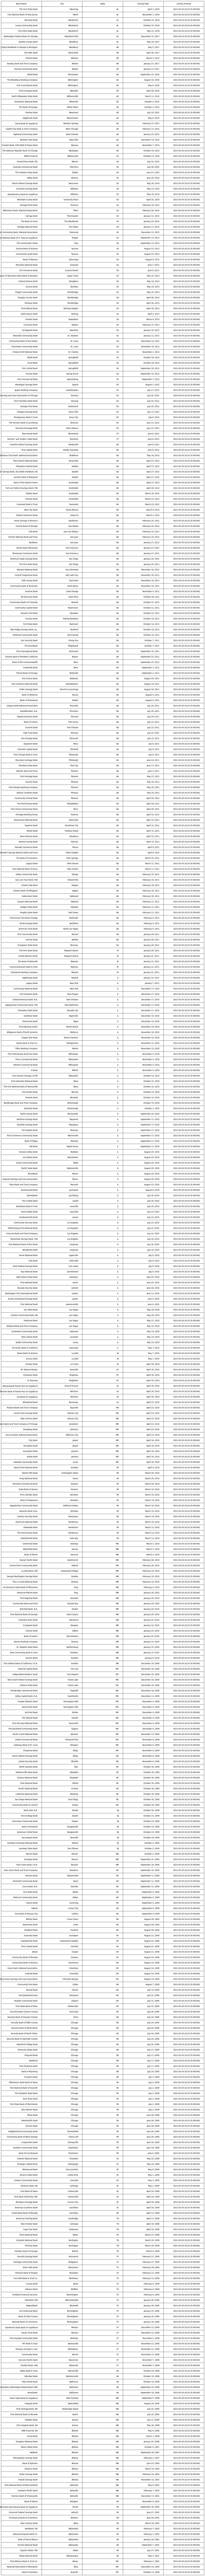

In [30]:
fig, ax =plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=test2.values,colLabels=test2.columns,loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(4,3)
# the_table.auto_set_column_width(5)
# the_table.Cell(10,10)

In [31]:
pp = PdfPages("Assessment.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()